In [4]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


# Data Preprocessing

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import matplotlib.pyplot as plt
from IPython.display import HTML

In [3]:
IMAGE_SIZE=256 #each side
BATCH_SIZE=32 #A standard batch size
CHANNELS=3 #RGB color channel
EPOCHS=50

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset) #68*32 that means 68 of batches of 32

68

In [7]:
68*32

2176

In [8]:
type(dataset)

tensorflow.python.data.ops.batch_op._BatchDataset

In [9]:
print(dataset)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
for image_batch,label_batch in dataset.take(3):
    print(image_batch.shape) #me - 32 images, 256*256 pixels, 3 RGB color channels
    print(label_batch.numpy()) #Class of each image represented by 0,1,2
    # 0 - 'Potato___Early_blight'
    # 1 - 'Potato___Late_blight'
    # 2 - 'Potato___healthy'

(32, 256, 256, 3)
[0 1 1 1 0 1 1 0 0 2 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1]
(32, 256, 256, 3)
[0 1 0 0 0 1 0 1 0 0 1 1 2 2 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0]
(32, 256, 256, 3)
[1 1 0 1 0 1 0 0 0 0 1 0 2 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 2 0 2 0]


In [11]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0]) #0 means the 1st image out of the 32

tf.Tensor(
[[[176. 173. 190.]
  [180. 177. 194.]
  [183. 180. 197.]
  ...
  [138. 136. 147.]
  [141. 139. 150.]
  [144. 142. 153.]]

 [[172. 169. 186.]
  [174. 171. 188.]
  [176. 173. 190.]
  ...
  [148. 146. 157.]
  [150. 148. 159.]
  [153. 151. 162.]]

 [[186. 183. 200.]
  [182. 179. 196.]
  [179. 176. 193.]
  ...
  [148. 146. 157.]
  [142. 140. 151.]
  [140. 138. 149.]]

 ...

 [[199. 196. 203.]
  [196. 193. 200.]
  [195. 192. 199.]
  ...
  [133. 132. 140.]
  [152. 151. 159.]
  [170. 169. 177.]]

 [[198. 195. 202.]
  [197. 194. 201.]
  [195. 192. 199.]
  ...
  [157. 156. 164.]
  [155. 154. 162.]
  [177. 176. 184.]]

 [[192. 189. 196.]
  [195. 192. 199.]
  [192. 189. 196.]
  ...
  [177. 176. 184.]
  [152. 151. 159.]
  [159. 158. 166.]]], shape=(256, 256, 3), dtype=float32)


In [12]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[166. 168. 180.]
  [163. 165. 177.]
  [161. 163. 175.]
  ...
  [149. 151. 164.]
  [151. 153. 166.]
  [157. 159. 172.]]

 [[170. 172. 184.]
  [168. 170. 182.]
  [165. 167. 179.]
  ...
  [154. 156. 169.]
  [154. 156. 169.]
  [159. 161. 174.]]

 [[172. 174. 186.]
  [170. 172. 184.]
  [167. 169. 181.]
  ...
  [156. 158. 171.]
  [156. 158. 171.]
  [160. 162. 175.]]

 ...

 [[149. 148. 156.]
  [151. 150. 158.]
  [151. 150. 158.]
  ...
  [125. 123. 136.]
  [128. 126. 139.]
  [128. 126. 139.]]

 [[120. 119. 127.]
  [122. 121. 129.]
  [124. 123. 131.]
  ...
  [119. 117. 130.]
  [116. 114. 127.]
  [112. 110. 123.]]

 [[126. 125. 133.]
  [126. 125. 133.]
  [128. 127. 135.]
  ...
  [129. 127. 140.]
  [118. 116. 129.]
  [108. 106. 119.]]]


In [13]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


In [14]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0][0])

tf.Tensor(
[[192. 190. 203.]
 [193. 191. 204.]
 [189. 187. 200.]
 [183. 181. 194.]
 [179. 177. 190.]
 [178. 176. 189.]
 [174. 172. 185.]
 [169. 167. 180.]
 [185. 183. 196.]
 [185. 183. 196.]
 [184. 182. 195.]
 [183. 181. 194.]
 [182. 180. 193.]
 [182. 180. 193.]
 [181. 179. 192.]
 [181. 179. 192.]
 [176. 174. 185.]
 [185. 183. 194.]
 [186. 184. 195.]
 [186. 184. 195.]
 [193. 191. 202.]
 [189. 187. 198.]
 [184. 182. 193.]
 [189. 187. 198.]
 [191. 189. 200.]
 [194. 192. 203.]
 [196. 194. 205.]
 [194. 192. 203.]
 [189. 187. 198.]
 [186. 184. 195.]
 [187. 185. 196.]
 [190. 188. 199.]
 [197. 195. 206.]
 [194. 192. 203.]
 [191. 189. 200.]
 [190. 188. 199.]
 [192. 190. 201.]
 [194. 192. 203.]
 [196. 194. 205.]
 [196. 194. 205.]
 [188. 186. 197.]
 [187. 185. 196.]
 [192. 190. 201.]
 [195. 193. 204.]
 [189. 187. 198.]
 [183. 181. 192.]
 [191. 189. 200.]
 [206. 204. 215.]
 [195. 193. 204.]
 [196. 194. 205.]
 [194. 192. 203.]
 [191. 189. 200.]
 [191. 189. 200.]
 [193. 191. 202.]
 [191. 189. 200.]

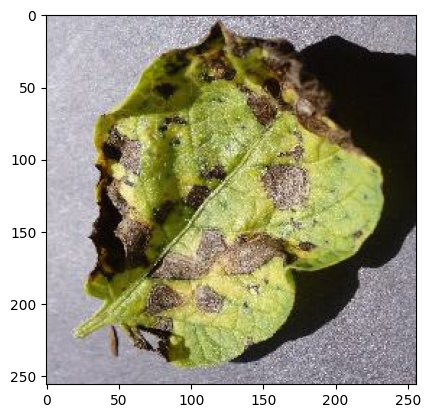

In [15]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

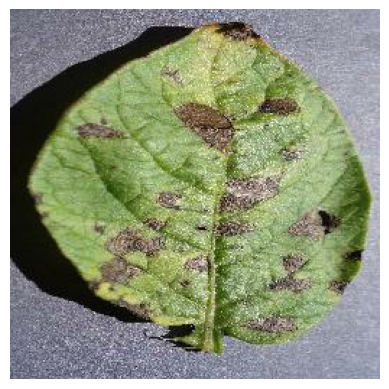

In [16]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off") #remove axis

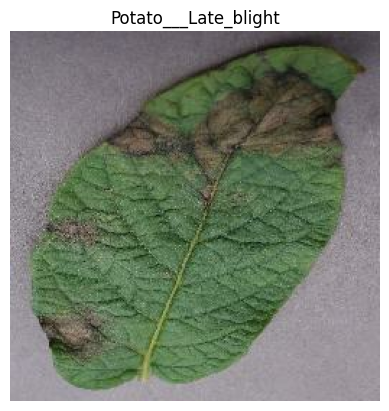

In [17]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    #plt.title(label_batch[0])
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

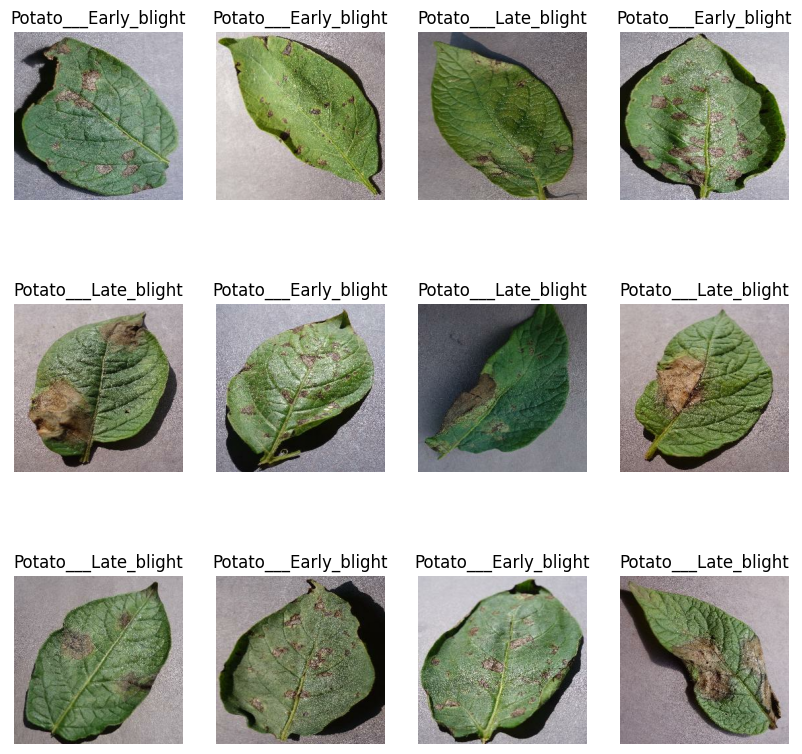

In [18]:
#display deveral images
plt.figure(figsize=(10,10)) #to increase area of each image to avoid overlapping
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [19]:
len(dataset)

68

In [20]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [21]:
train_size=0.8
#dataset.take(10) #takes first 10 samples
len(dataset)*train_size

54.400000000000006

In [22]:
train_ds=dataset.take(54) #takes first 54 samples #arr[:54]
len(train_ds)

54

In [23]:
test_ds=dataset.skip(54) #54 onwards arr[54:]
len(test_ds) #temporary test_ds with both val_ds and test_ds

14

In [24]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [25]:
val_ds=dataset.take(6) #takes first 54 samples #arr[:54]
len(val_ds)

6

In [26]:
test_ds=test_ds.skip(6) #54 onwards arr[54:]
len(test_ds)

8

In [27]:
#Actual function to split

def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)
#     test_size=int(ds_size*test_split)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [28]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [29]:
len(train_ds)

54

In [30]:
len(val_ds)

6

In [31]:
len(test_ds)

8

In [32]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [33]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [34]:
#For new tensorflow versions

# resize_and_rescale = tf.keras.Sequential([
#     tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
#     tf.keras.layers.Rescaling(1.0 / 255)
# ])

In [35]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

# Convolutional Neural Network

In [36]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

IMAGE_SIZE

256

In [37]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    # first convolution layer
    layers.Conv2D(32, (3, 3), activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
 
    # second convolution layer
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    # third convolution layer
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    # fourth convolution layer
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    # fifth convolution layer
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    # sixth convolution layer
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
 
    # fully connected classification
    # single vector
    layers.Flatten(),
        
    # hidden layer and output layer
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax")
])

In [38]:
model.build(input_shape=input_shape)

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [40]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [41]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 147s 3s/step - loss: 0.9086 - accuracy: 0.4850 - val_loss: 0.8675 - val_accuracy: 0.4531
Epoch 2/50
54/54 [==============================] - 118s 2s/step - loss: 0.6901 - accuracy: 0.6968 - val_loss: 0.6265 - val_accuracy: 0.7760
Epoch 3/50
54/54 [==============================] - 115s 2s/step - loss: 0.5533 - accuracy: 0.7500 - val_loss: 0.4299 - val_accuracy: 0.8125
Epoch 4/50
54/54 [==============================] - 124s 2s/step - loss: 0.3436 - accuracy: 0.8582 - val_loss: 0.4531 - val_accuracy: 0.8281
Epoch 5/50
54/54 [==============================] - 129s 2s/step - loss: 0.2964 - accuracy: 0.8779 - val_loss: 0.4124 - val_accuracy: 0.8177
Epoch 6/50
54/54 [==============================] - 122s 2s/step - loss: 0.2323 - accuracy: 0.9138 - val_loss: 0.4582 - val_accuracy: 0.8594
Epoch 7/50
54/54 [==============================] - 127s 2s/step - loss: 0.1657 - accuracy: 0.9392 - val_loss: 0.2377 - val_accuracy: 0.9010
Epoch 8/50
54

In [42]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 12s 377ms/step - loss: 0.1244 - accuracy: 0.9609


In [43]:
scores

[0.12438023835420609, 0.9609375]

In [44]:
history

In [45]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [47]:
history.history['accuracy']

[0.48495370149612427,
 0.6967592835426331,
 0.75,
 0.8582175970077515,
 0.8778935074806213,
 0.9137731194496155,
 0.9392361044883728,
 0.9363425970077515,
 0.9461805820465088,
 0.9450231194496155,
 0.9635416865348816,
 0.9565972089767456,
 0.9716435074806213,
 0.9282407164573669,
 0.9496527910232544,
 0.9716435074806213,
 0.9699074029922485,
 0.9855324029922485,
 0.9774305820465088,
 0.9774305820465088,
 0.9699074029922485,
 0.9704861044883728,
 0.9861111044883728,
 0.9918981194496155,
 0.9814814925193787,
 0.9861111044883728,
 0.9832175970077515,
 0.9907407164573669,
 0.9849537014961243,
 0.9803240895271301,
 0.9884259104728699,
 0.9890046119689941,
 0.984375,
 0.9924768805503845,
 0.9901620149612427,
 0.9918981194496155,
 0.9826388955116272,
 0.9965277910232544,
 0.9901620149612427,
 0.9768518805503845,
 0.9832175970077515,
 0.9878472089767456,
 0.9965277910232544,
 0.9907407164573669,
 0.984375,
 0.9855324029922485,
 0.9895833134651184,
 0.9942129850387573,
 0.9913194179534912,
 0.9

In [48]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

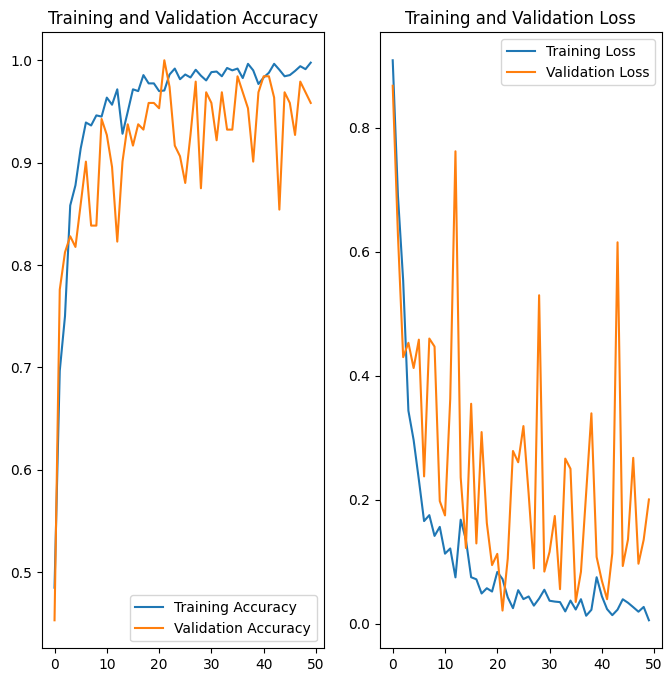

In [49]:
plt.figure(figsize=(8,8))

#Training and Validation Accuracy
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [50]:
#Display first image as numpy array
for images_batch, labels_batch in test_ds.take(1): #take only te 1st batch
    #images_batch elements are tensors. to turn them into numpy we can use .numpy()
    first_image=images_batch[0].numpy().astype('uint8')
#print(images_batch[0])-->gives tensor
#print(images_batch[0].numpy())-->gives numpy
#print(images_batch[0].numpy().astype('uint8'))-->gives 3 dimentional rgb array
#plt.imshow(images_batch[0].numpy().astype('uint8'))-->gives image

first_image

array([[[144, 144, 154],
        [119, 119, 129],
        [143, 143, 153],
        ...,
        [139, 133, 145],
        [148, 142, 154],
        [128, 122, 134]],

       [[138, 138, 148],
        [140, 140, 150],
        [162, 162, 172],
        ...,
        [172, 166, 178],
        [147, 141, 153],
        [152, 146, 158]],

       [[153, 153, 163],
        [152, 152, 162],
        [140, 140, 150],
        ...,
        [151, 145, 157],
        [135, 129, 141],
        [154, 148, 160]],

       ...,

       [[151, 149, 160],
        [188, 186, 197],
        [196, 194, 205],
        ...,
        [184, 181, 192],
        [186, 183, 194],
        [175, 172, 183]],

       [[176, 174, 185],
        [181, 179, 190],
        [160, 158, 169],
        ...,
        [174, 171, 182],
        [184, 181, 192],
        [179, 176, 187]],

       [[183, 181, 192],
        [165, 163, 174],
        [174, 172, 183],
        ...,
        [162, 159, 170],
        [177, 174, 185],
        [179, 176, 187]]

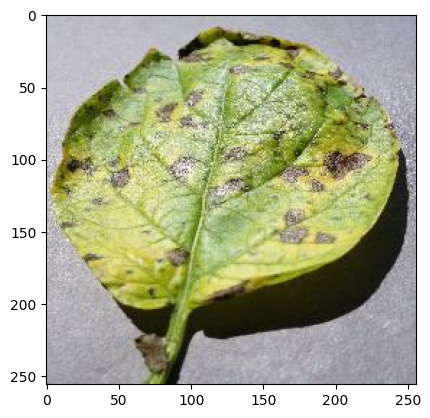

In [51]:
#Display first image
for images_batch, labels_batch in test_ds.take(1): #take only te 1st batch
    #images_batch elements are tensors. to turn them into numpy we can use .numpy()
    plt.imshow(images_batch[0].numpy().astype('uint8'))


first image to predict
first image's actual label :  0
first image's class type :  Potato___Early_blight
1/1 [==============================] - 3s 3s/step
[1.0000000e+00 2.6070284e-13 4.1629839e-21]
Index of the class with the highest value :  0
Class name of the class with the highest value :  Potato___Early_blight


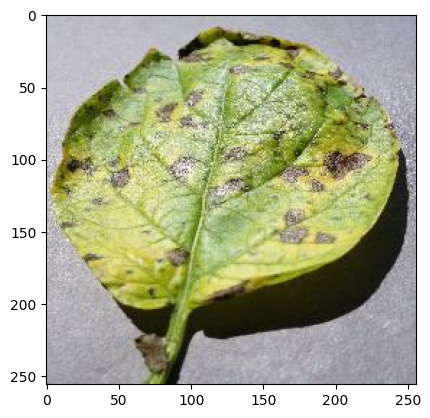

In [52]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1): #take only te 1st batch
    #images_batch elements are tensors. to turn them into numpy we can use .numpy()
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    
    print("first image's actual label : ",first_label)
    print("first image's class type : ",class_names[first_label])

    batch_prediction=model.predict(images_batch) #For the whole batch
    print(batch_prediction[0]) #Prediction only for the first image
    #here you will see 3 values. The highest value is the correct class of the leaf
    
    print("Index of the class with the highest value : ",np.argmax(batch_prediction[0]))
    print("Class name of the class with the highest value : ",class_names[np.argmax(batch_prediction[0])])

In [53]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

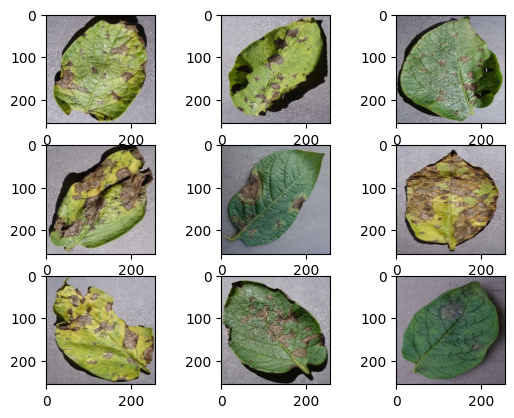

In [54]:
for images, labels in test_ds.take(1):
    for i in range(9):
#         plt.imshow(images[i].numpy().astype("uint8")) #Only shows one image
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

1/1 [==============================] - 0s 221ms/step


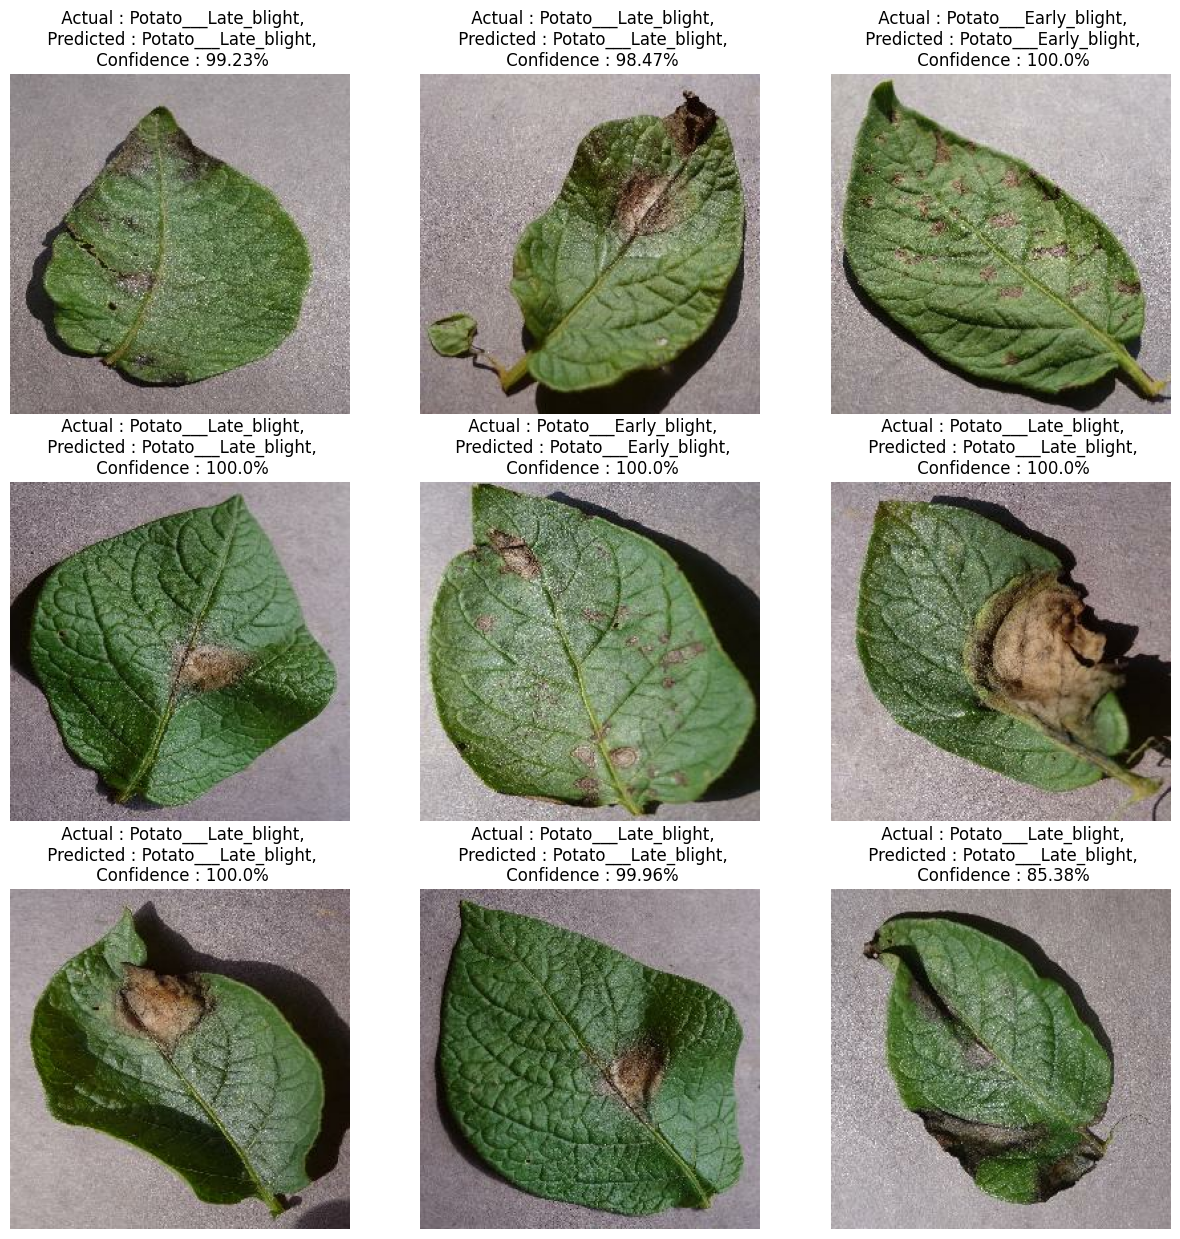

In [55]:
plt.figure(figsize=(15,15)) #to make image size bigger
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f" Actual : {actual_class},\n Predicted : {predicted_class},\n Confidence : {confidence}%")
        
        plt.axis("off")

In [57]:
import shutil

# Zip the exported model directory for download
shutil.make_archive('my_model_savemodel', 'zip', 'my_model_savemodel')

'C:\\Users\\User\\Desktop\\potato-disease\\Plant-Disease-Detection-System\\training\\my_model_savemodel.zip'

In [68]:
model.save(f'../models/my_model.h5')

In [69]:
model.save(f'../saved_models/my_model.h5')

In [71]:
model.save(f'../saved_models/my_model.keras')

In [58]:
model.save(f'../saved_models/my_model_savemodel')

INFO:tensorflow:Assets written to: ../saved_models/my_model_savemodel\assets


INFO:tensorflow:Assets written to: ../saved_models/my_model_savemodel\assets


In [73]:
model.save('my_model.h5')

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [66]:
# import os
# model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
# model.save(f'../models/{model_version}.h5')

ValueError: invalid literal for int() with base 10: 'deleteme'

In [64]:
# import os
# model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
# model.save(f"../models/{model_version}")

In [65]:
# model.save(f"../models/{model_version}")
# model_version=1
